 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [24]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [25]:
# Reading whale returns
whale = pd.read_csv("../lesson3/Unit 3 Homework/Starter_Code/Resources/whale_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
whale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [26]:
# Count nulls
#whale.isnull()
#whale.isnull().sum()
whale.isnull().sum().sum()

4

In [27]:
# Drop nulls
whale2 = whale.dropna()
whale2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 2015-03-03 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [28]:
# Reading algorithmic returns
algo = pd.read_csv("../lesson3/unit 3 Homework/Starter_Code/Resources/algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
algo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [29]:
# Count nulls
algo.isnull().sum().sum()

6

In [30]:
# Drop nulls
algo2 = algo.dropna()
algo2.isnull().sum().sum()

0

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [31]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv("../lesson3/Unit 3 Homework/Starter_Code/Resources/sp500_history.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [32]:
# Check Data Types
sp500.dtypes
#print (sp500.info())
#print (sp500.head())

Close    object
dtype: object

In [33]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str[1:]
sp500['Close'] = sp500['Close'].astype(float)
print (sp500.info())
#print (sp500.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None


In [34]:
# Calculate Daily Returns
sp500 = sp500.sort_values(by='Date',ascending=True)
sp500['daily_return'] = sp500['Close'].pct_change(1)
print (sp500.head())

              Close  daily_return
Date                             
2012-10-01  1444.49           NaN
2012-10-02  1445.75      0.000872
2012-10-03  1450.99      0.003624
2012-10-04  1461.40      0.007174
2012-10-05  1460.93     -0.000322


In [35]:
# Drop nulls
sp500_1 = sp500.dropna()
print (sp500_1.info())
print (sp500_1.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1648 non-null   float64
 1   daily_return  1648 non-null   float64
dtypes: float64(2)
memory usage: 38.6 KB
None
              Close  daily_return
Date                             
2012-10-02  1445.75      0.000872
2012-10-03  1450.99      0.003624
2012-10-04  1461.40      0.007174
2012-10-05  1460.93     -0.000322
2012-10-08  1455.88     -0.003457


In [36]:
# Rename `Close` Column to be specific to this portfolio.
sp500_1.drop('Close', axis=1, inplace=True)
sp500_1.rename(columns = {'daily_return':'SP500'}, inplace=True)
print (sp500_1.info())
#print (sp500_1.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None


C:\Users\Queeny\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Queeny\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## Combine Whale, Algorithmic, and S&P 500 Returns

In [129]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
merged = pd.concat([whale2,algo2, sp500_1],axis='columns', join='inner')
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2015-03-03 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1043 non-null   float64
 1   PAULSON & CO.INC.            1043 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1043 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1043 non-null   float64
 4   Algo 1                       1043 non-null   float64
 5   Algo 2                       1043 non-null   float64
 6   SP500                        1043 non-null   float64
dtypes: float64(7)
memory usage: 65.2 KB


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

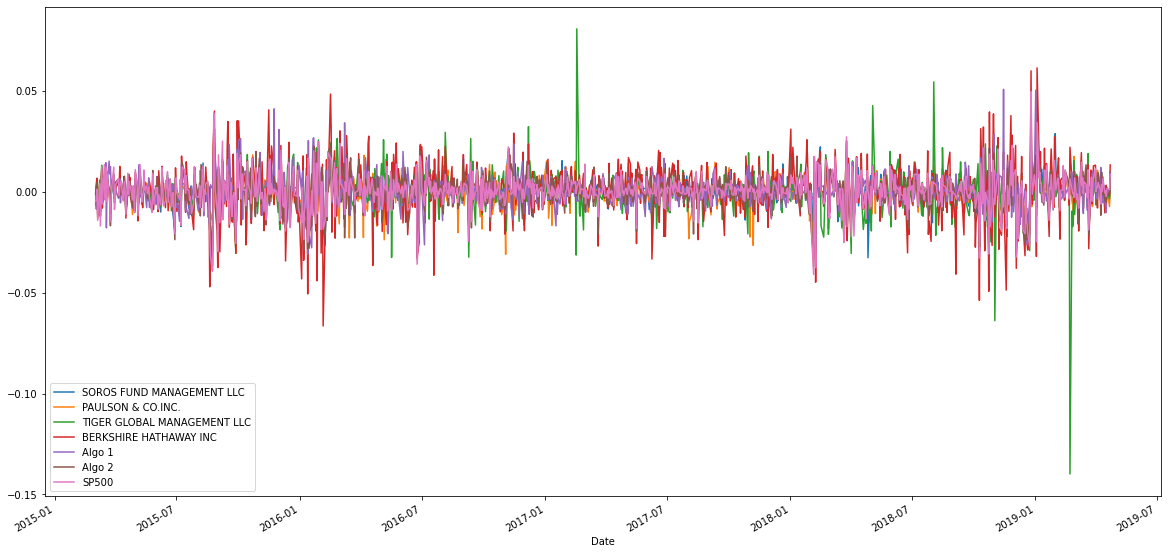

In [38]:
# Plot daily returns of all portfolios
merged.plot(figsize=(20,10))
#merged_1 = merged.drop(['SP500_Close'], axis=1)
#merged_1.info()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

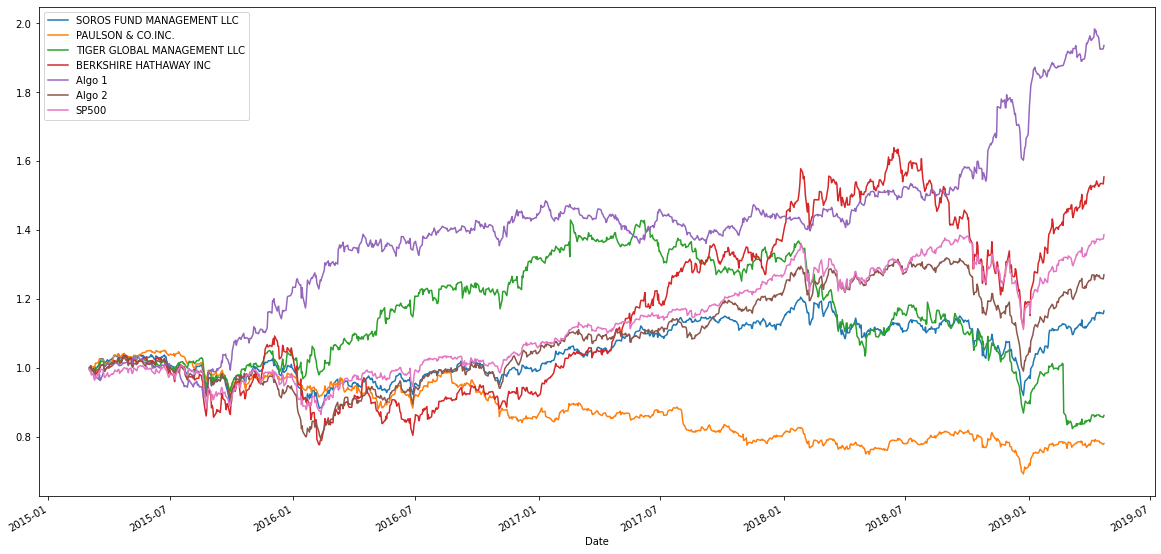

In [39]:
# Calculate cumulative returns of all portfolios
merged_1 = (1 + merged).cumprod()
#merged_1.head()
# Plot cumulative returns
merged_1.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns'}>

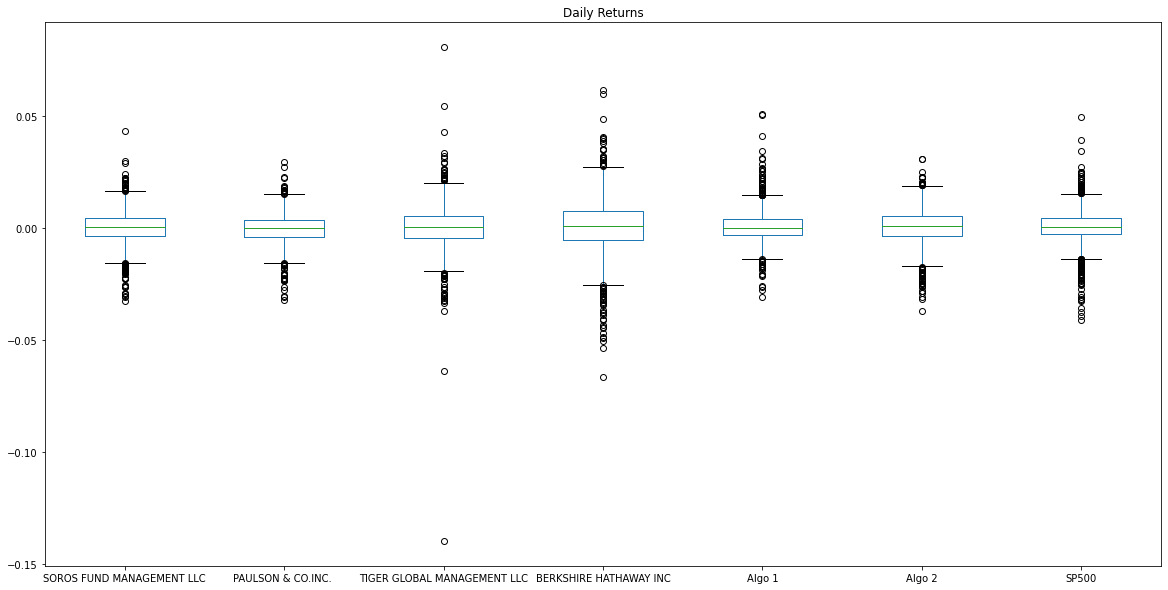

In [40]:
# Box plot to visually show risk
merged.plot.box(title='Daily Returns',figsize=(20,10))

### Calculate Standard Deviations

In [41]:
# Calculate the daily standard deviations of all portfolios
merged_sd = merged.std()
merged_sd

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [42]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = merged.std()['SP500']
print (sp500_std)
# Determine which portfolios are riskier than the S&P 500
##Tiger and Bershire have higher standard deviation than S&P500; therefore, riskier.

0.008553731597758204


### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized Standard Deviation (volatility) = Standard Deviation of Daily Returns * Square Root (252)
volatility = merged.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

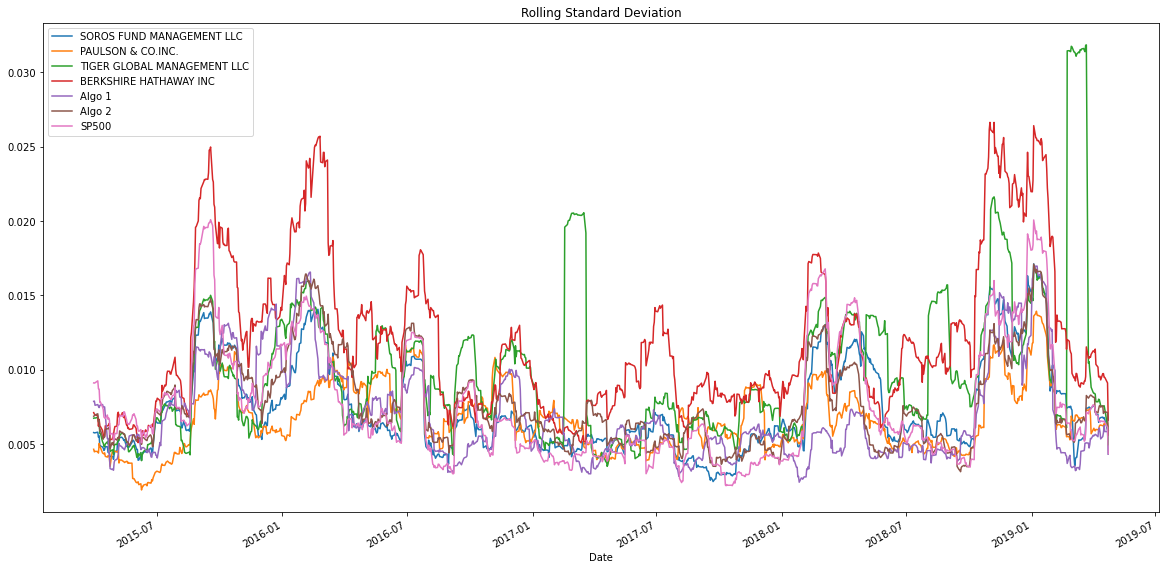

In [44]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = merged.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(title = 'Rolling Standard Deviation', figsize=(20,10))

### Calculate and plot the correlation

In [45]:
# Calculate the correlation
Correlation = merged.corr()
# Display de correlation matrix
Correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta of Algo 1'}, xlabel='Date'>

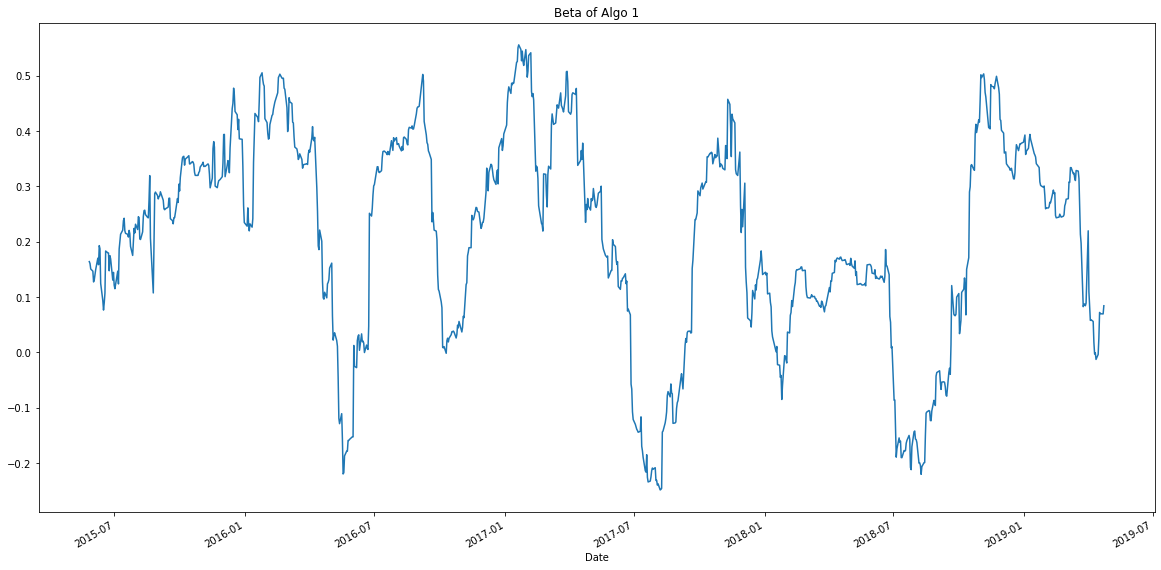

In [179]:
## Calculate covariance of a single portfolio
covariance= merged['Algo 1'].rolling(window=60).cov(merged['SP500'])

## Calculate variance of S&P 500
variance = merged['SP500'].rolling(window=60).var()

##Computing beta
algo1_beta = covariance/ variance

## Plot beta trend
algo1_beta.plot(figsize=(20,10), title='Beta of Algo 1')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [50]:
# Use `ewm` to calculate the rolling window
merged.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
risk_free_rate = pd.read_csv('risk_free_rate.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
merged_sharpe = pd.concat([merged, risk_free_rate],axis='columns', join='inner')
sharpe_ratios = ((merged_sharpe.mean()-merged_sharpe['rf_rate'].mean()) * 252) / (merged_sharpe.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.203632
PAULSON & CO.INC.             -0.703093
TIGER GLOBAL MANAGEMENT LLC   -0.280734
BERKSHIRE HATHAWAY INC         0.521263
Algo 1                         1.147535
Algo 2                         0.314133
SP500                          0.492225
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

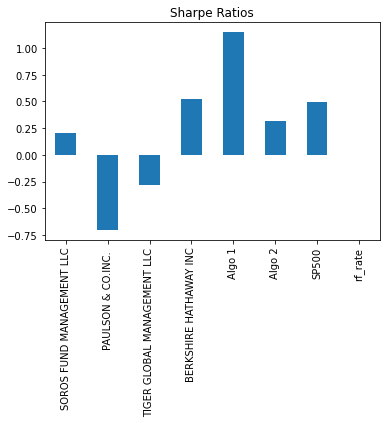

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
#The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.  Algo 1 outperforms both shales and S&P500.  Algo 2 may be outperforming whales but not S&P500.  

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [60]:
# Reading data from 1st stock
goog = pd.read_csv('../lesson3/Unit 3 Homework/Starter_Code/Resources/goog_historical.csv',  index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-05-09 to 2018-05-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  250 non-null    object 
 1   NOCP    250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


In [62]:
# Reading data from 2nd stock
appl = pd.read_csv('../lesson3/Unit 3 Homework/Starter_Code/Resources/aapl_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
appl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-05-09 to 2018-05-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  250 non-null    object 
 1   NOCP    250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


In [63]:
# Reading data from 3rd stock
cost = pd.read_csv('../lesson3/Unit 3 Homework/Starter_Code/Resources/cost_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2019-05-09 to 2018-05-11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  250 non-null    object 
 1   NOCP    250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


In [66]:
# Combine all stocks in a single DataFrame
combined = pd.concat([goog, appl, cost],axis='rows', join='inner')
combined.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [67]:
# Reset Date index
combined.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40
...,...,...,...
745,2018-05-17,COST,199.60
746,2018-05-16,COST,198.71
747,2018-05-15,COST,195.48
748,2018-05-14,COST,195.88


In [73]:
# Reorganize portfolio data by having a column per symbol
combined2=combined.pivot(columns='Symbol')
combined2.columns = ['AAPL', 'COST', 'GOOG'] 
combined2
#combined2.info()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [83]:
# Calculate daily returns
#sp500 = sp500.sort_values(by='Date',ascending=True)
all_returns = combined2.pct_change()
all_returns
# Drop NAs
all_returns2 = all_returns.dropna()
# Display sample data
all_returns2.info()
all_returns2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-05-14 to 2019-05-09
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    249 non-null    float64
 1   COST    249 non-null    float64
 2   GOOG    249 non-null    float64
dtypes: float64(3)
memory usage: 7.8 KB


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [92]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = all_returns2.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
joined = pd.concat([all_returns2, portfolio_returns],axis='columns', join='inner')
joined.rename(columns = { 0 : 'SP500'}, inplace = True)
joined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-05-14 to 2019-05-09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    249 non-null    float64
 1   COST    249 non-null    float64
 2   GOOG    249 non-null    float64
 3   SP500   249 non-null    float64
dtypes: float64(4)
memory usage: 9.7 KB


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined.dropna()
joined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-05-14 to 2019-05-09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    249 non-null    float64
 1   COST    249 non-null    float64
 2   GOOG    249 non-null    float64
 3   SP500   249 non-null    float64
dtypes: float64(4)
memory usage: 9.7 KB


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized `std`
# Annualized Standard Deviation (volatility) = Standard Deviation of Daily Returns * Square Root (252)
a_std = all_returns2.std() * np.sqrt(252)
a_std

AAPL    0.296955
COST    0.209320
GOOG    0.263554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Trade DATE'>

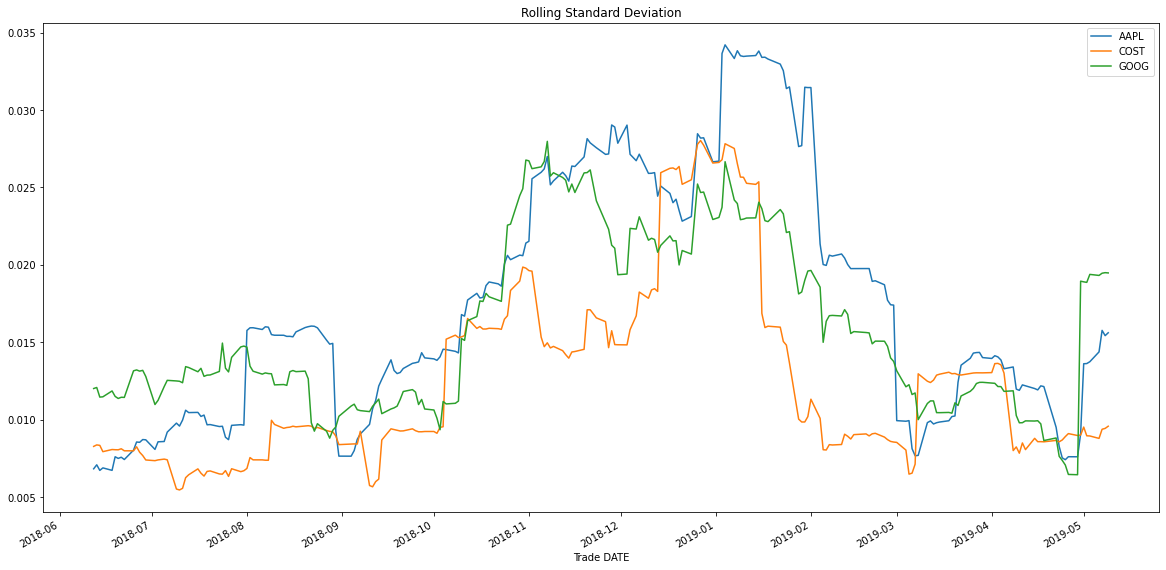

In [94]:
# Calculate rolling standard deviation
rolling_std = all_returns2.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(title = 'Rolling Standard Deviation', figsize=(20,10))

### Calculate and plot the correlation

In [95]:
# Calculate and plot the correlation
Correl = all_returns2.corr()
# Display de correlation matrix
Correl

,AAPL,COST,GOOG
AAPL,1.000000,0.413546,0.655007
COST,0.413546,1.000000,0.385145
GOOG,0.655007,0.385145,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Trade DATE'>

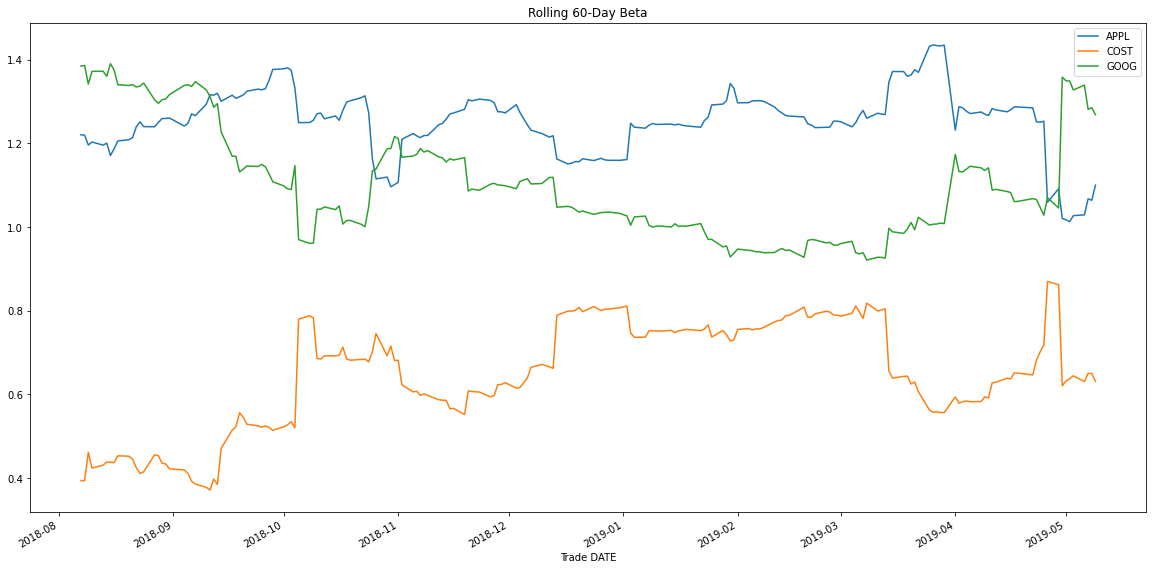

In [197]:
# Calculate and plot Beta
## Calculate covariances of portfolio
roll_covar_appl= joined['AAPL'].rolling(window=60).cov(joined['SP500'])
roll_covar_cost= joined['COST'].rolling(window=60).cov(joined['SP500'])
roll_covar_goog= joined['GOOG'].rolling(window=60).cov(joined['SP500'])
## Calculate variance of S&P 500
roll_var = joined['SP500'].rolling(window=60).var()
## Calculate betas
roll_beta_appl = roll_covar_appl / roll_var
roll_beta_cost = roll_covar_cost / roll_var
roll_beta_goog = roll_covar_goog / roll_var
## Plot beta trend
roll_beta = pd.concat([roll_beta_appl, roll_beta_cost, roll_beta_goog ],axis='columns', join='inner')
roll_beta.rename(columns = {0 : 'APPL', 1 : 'COST', 2: 'GOOG'}, inplace = True)
roll_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [121]:
# Calculate Annualzied Sharpe Ratios
joined_sharpe = pd.concat([joined, risk_free_rate],axis='columns', join='inner')
sharpe_ratios2 = ((joined_sharpe.mean()-joined_sharpe['rf_rate'].mean()) * 252) / (joined_sharpe.std() * np.sqrt(252))
sharpe_ratios2

AAPL       0.340588
COST       0.830753
GOOG       0.245920
SP500      0.539418
rf_rate    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

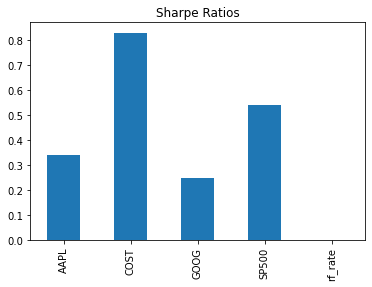

In [122]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio consists of equal quantity of AAPL, COST, and GOOG.  COST is the only one out of the three that out-performs SP500.  It may be better to increase the proportion of COST and decrease APPL and GOOG.  